# Geografisk analyse: punktmønstre
___


_*Tilrettelagt for python-introduksjon ved IVB 13.03.2019*_

___

Ønsker å finne ut om et punktmønster er av typen

- CSR: Complete Spatial Randomness (punktene forekommer i et helt tilfeldig mønster), eller
- Cluster (gruppert) - noe som kan gi grunnlag for videre undersøkelser

Analyseres/avgjøres ved visuell inspeksjon av grafer som viser avstand til nærmeste nabopunkt. Grafene lages ved hjelp av funksjonene G og F.


### G-funksjonen

Funksjonen angir hvor stor andel av punktene i datasettet $S$ som har nærmeste nabo-avstand mindre enn avstanden $d$. Den uttrykker avstander internt i datasettet vi vil undersøke.


$$ G(d) =  \frac{no. [d_{min}({\textbf s}_i) < d]}{n} $$



### F-funksjonen

Funksjonen angir hvor stor andel av punktene i datasettet $P$, bestående av tilfeldig genererte punkt, som har en minste-avstand til et punkt i datasettet $S$ mindre enn avstanden $d$. Den utrykker avstander fra et tilfeldig valgt punkt i planet til nærmeste punkt i datasettet vi vil undersøke.


$$ F(d) =  \frac{no. [d_{min}({\textbf p}_i, S) < d]}{m} $$



### Forventede verdier av G-funksjon ved CSR

$$ E[G(d)] = 1 -e^{-\lambda\pi d^2} $$

### Forventede verdier av F-funksjon ved CSR

$$ E[F(d)] = 1 -e^{-\lambda\pi d^2} $$

___

Den observante leser vil legge merke til at de forventede verdiene av G- og F-funksjonene er like når punktene er fordelt i et CRS-mønster. Med andre ord, så vil kurvene være sammenfallende.



In [1]:
# Kode er hentet fra:

# Pana.py - Calculating G- and F-function values
# 
# made by: sverre.stikbakke@hig.no 26.02.2007


In [2]:
# Importerer hjelpefunksjoner

import math
import random
import pylab


In [3]:
# Funksjon for å lage et datasett ved simulering - trekking av tilfeldige tall fra normalfordeling
#
# n: antall punkt som skal genereres
# mu: forventning
# sigma: standardavvik
#
# Returnerer dictionary med punkt-ID, x- og y-verdi

def createRandomPoints(n, mu, sigma):
    S = {}
    for i in range(1, n + 1):
        x = random.normalvariate(mu,sigma)
        y = random.normalvariate(mu,sigma)
        S[i] = x, y
    return S


In [4]:
# Test av enkelt-funksjon

n = 20
mu = 30
sigma = 50

S1 = createRandomPoints(n, mu, sigma)

#S1


In [5]:
# Funksjon for å lage et datasett ved simulering - CSR-type (punkter med helt tilfeldig fordeling)
#
# m: Antall punkt som skal genereres
#
# Returnerer dictionary med punkt-ID, x- og y-verdi

def createCSR(m, xRangeMin, xRangeMax, yRangeMin, yRangeMax):
    S = {}  
    for i in range(1, m + 1):
        x = random.randint(xRangeMin, xRangeMax)
        y = random.randint(yRangeMin, yRangeMax)
        S[i] = x, y
    return S


In [6]:
# Beregner nærmeste nabo-avstand for alle punkter innbyrdes i datasettet
# Brukes for å beregne G-funksjonen
# 
# S: mulig cluster-datasett (dictionary)
#
# Returnerer dictionary med nærmeste nabo-avstander

def NNG(S, infinity):
    D = {}
    for i in S:
        dMin = infinity
        for j in S:
            if i is not j:
                d = euclidianDistance(S[i], S[j])
                if d < dMin:
                    dMin = d
                    D[i] = dMin  
    return D


In [7]:
# Beregner nærmeste nabo-avstand fra CSR-datasett til mulig cluster-datasett
# Brukes for å beregne S-funksjonen
#
# S: mulig cluster-datasett
# P: CSR-datasett (dictionary)
#
# Returnerer dictionary med nærmeste nabo-avstander

def NNF(S, P, infinity):
    D = {}
    for i in P:
        dMin = infinity
        for j in S:
            d = euclidianDistance(P[i],S[j])
            if d < dMin:
                dMin = d
                D[i] = dMin
    return D


In [8]:
# Beregner gjennomsnittlig nærmeste nabo-avstand
#
# D: Liste (dictionary) med nærmeste nabo-avstander
#
# Returnerer et desimaltall

def meanNN(D):
    n = len(D)
    SS = 0
    for i in D:
        SS += D[i]
    return SS/n


In [9]:
# Lager lister med X- og Y-koordinater for plotting (hver akse for seg)
# 
# T: Datasett bestående av punkter med X- og Y-verdier
#
# Returnerer to lister med henholdsvis X- og Y-verdi

def makeXY(T):
    X = []
    Y = []
    for i in T:
        X.append(T[i][0])
        Y.append(T[i][1])
    return X, Y


In [10]:
# Beregner funksjonsverdier for G- og F-funksjonen
# 
# D: Nærmeste nabo-avstander - beregnet i NNG- og NNF-funksjonene
# xRangeMax: Maks-verdi for X-aksen
#
# Returnerer to lister:
#   X med avstandsverdier (d)
#   Y med akkumulert andel av alle punktene med nærmeste nabo-avstand < d 

def cumulativeFrequencyValues(D, xRangeMax):
    X = []
    Y = []
    m = len(D)  
        
    for x in range(xRangeMax + 1):
        n = 0
        for i in D:
            if D[i] < x:
                n += 1

        fraction = float(n)/(float(m))

        X.append(x)
        Y.append(fraction)

    return X, Y


In [11]:
# Lager plott for datasettene i en figur, og graf-plott i en annen figur
#
# XS: X-verdier for mulig cluster-datasett
# YS: Y-verdier for mulig cluster-datasett

# XP: X-verdier for CSR-datasett
# YP: Y-verdier for CSR-datasett

# XG: X-verdier G-funksjon
# YG: Y-verdier G-funksjon

# XF: X-verdier F-funksjon
# YF: Y-verdier F-funksjon

def makePlot(XS, YS, XP, YP, XG, YG, XF, YF):
    pylab.figure(figsize=(20, 8))

    pylab.subplot(1, 2, 1)
    pylab.plot(XS, YS, 'o', XP, YP, '+')
    pylab.axis([0, 100, 0, 100])
    pylab.grid(True)
    pylab.xlabel("x-coordinate")
    pylab.ylabel("y-coordinate")

    pylab.subplot(1, 2, 2)
    pylab.step(XG, YG, XF, YF, where ='post', linewidth = 1)
    pylab.axis([0, 100, -0.1, 1.1])
    pylab.grid(True)
    pylab.xlabel("Distance (d)")
    pylab.ylabel("G(d), F(d)")  

    pylab.show()


In [12]:
# Beregner euklidisk avstand mellom to punkt (Pythagoras formel)
#
# p1: tuppel med x- og y-verdi for ett punkt
# p2: som p1

def euclidianDistance(p1, p2):
    return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)


In [13]:
# Hjelpefunksjon for å vise verdier
#
# meanD: Gjennomsnittlig avstand
# description: Forklarende tekst

def printMeanDistances(meanD, description):
    print(description, ": ", meanD)
    print()


In [14]:
# Hjelpefunksjon for å vise verdier
#
# D: Nærmeste nabo-avstander - beregnet i NNG- og NNF-funksjonene 
# description: Forklarende tekst

def printSortedDistances(D, description):

    Ds = []
    for i in D:
        Ds.append(D[i])
    Ds.sort()

    print(description, ": ", Ds)
    print()


In [15]:
# Main-funksjon: 
# 
# - setter inn verdier for variabler som brukes ved simulering
# - kaller simuleringsfunksjoner
# - lager datastrukturene som brukes ved plotting
# - kaller plottefunksjon

def main():  
    n = 20    # Antall punkt i mulig cluster-datasett
    m = 500   # Antall punkt i CSR-datasett

    # Grenseverdier for CSR-datasett
    xRangeMin = 0
    xRangeMax = 100
    yRangeMin = 0
    yRangeMax = 100

    mu = 50     # Forventet gjennomsnittlig verdi
    sigma = 5  # Standardavvik

    infinity = 2**100 # Stort tall

    # Trekker tilfeldige tall og lager datasett av disse
    S = createRandomPoints(n, mu, sigma)
    P = createCSR(m, xRangeMin, xRangeMax, yRangeMin, yRangeMax)

    # Beregner nærmeste nabo-avstander
    DG = NNG(S, infinity)
    DF = NNF(S, P, infinity)

    # Beregner gjennomsnittlig nærmeste nabo-avstand
    SNN = meanNN(DG)
    PNN = meanNN(DF)

    # Henter ut X- og Y-verdier fra datasettene
    XS, YS = makeXY(S)
    XP, YP = makeXY(P)

    # Beregner funksjonsverdier for G- og F-funksjon
    XG, YG = cumulativeFrequencyValues(DG, xRangeMax)
    XF, YF = cumulativeFrequencyValues(DF, xRangeMax)

    makePlot(XS, YS, XP, YP, XG, YG, XF, YF)

    printMeanDistances(SNN, "Gjennomsnittlig nærmeste nabo-avstand mellom punkter i datasett S")
    printMeanDistances(PNN, "Gjennomsnittlig nabo-avstand mellom punkter i datasett P og nærmeste punkt i S")

    #printSortedDistances(DG, "Alle nærmeste nabo-avsander i datasett S")
    #printSortedDistances(DF, "Alle nærmeste nabo-avsander i datasett P")


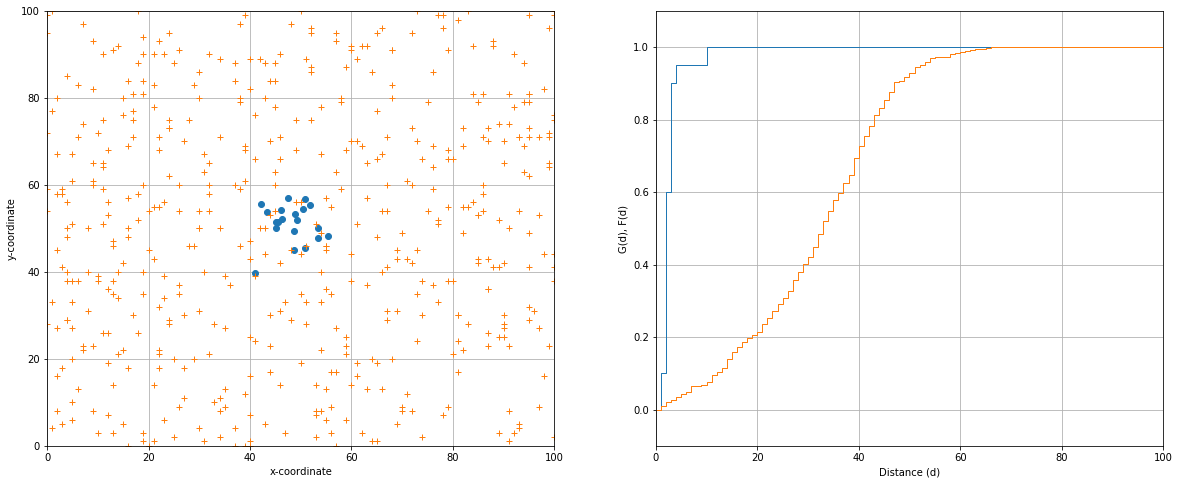

Gjennomsnittlig nærmeste nabo-avstand mellom punkter i datasett S :  2.178266261464124

Gjennomsnittlig nabo-avstand mellom punkter i datasett P og nærmeste punkt i S :  31.064950258437623



In [16]:
# Beregningene starter her ved å kalle opp (utføre) main-funksjonen. 
# Den vil igjen kalle de enkelte funksjonene som programmet består av.

main()